In [36]:
from math import factorial, log, ceil, log10
import numpy as np
from scipy.special import comb
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

# this is important to allow us to save figs as editable .pdf
# 42 is some magic number encoded into matplotlib for True Font type
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


#SMALL_SIZE = 20
#MEDIUM_SIZE = 25
#BIGGER_SIZE = 35
XUGROUP_IGOR_MACRO_SIZE = 22

plt.rc('font', family='Helvetica', size=XUGROUP_IGOR_MACRO_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=XUGROUP_IGOR_MACRO_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=XUGROUP_IGOR_MACRO_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=XUGROUP_IGOR_MACRO_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=XUGROUP_IGOR_MACRO_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XUGROUP_IGOR_MACRO_SIZE)    # legend fontsize
plt.rc('figure', titlesize=XUGROUP_IGOR_MACRO_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=1.5) # thicker lines to match Xu Group Igor Macros


# assuming RRs = 1 for all (not strictly true)
# assumign single chain of DP = DP

def sigfig(x, n=2):
    """Return 'x' rounded to 'n' significant digits."""
    y=abs(x)
    if y <= sys.float_info.min: return 0.0
    return round( x, int( n-ceil(log10(y)) ) )

def calc_counts(DP, MRs):
    N_each_mon = np.array(target_DP*np.array(MRs), int)
    actual_DP = int(np.sum(N_each_mon))

    #ceiling / highest bound
    #all_possible = log10(len(N_each_mon)**actual_DP)

    # calculate numerator / low bound
    counts = 1
    for i in range(len(N_each_mon)):
        counts *= comb(sum(N_each_mon[i:]),N_each_mon[i])

    #    if ((i + 1) == len(N_each_mon)):
    #        pmod_counts = counts


    rhp = log10(counts)
    #pmod_rhp = log10(pmod_counts)
    
    return rhp

In [48]:
########################
######## INPUTS ########
########################

target_DPs = [ 100 ] #DP ~444 is maximum for now without overflow - switch to double precision if we want more.
MRss = [ [0.2, 0.2, 0.2, 0.2, 0.2], [0.5, 0.25, 0.1, 0.1, 0.05] ]
pmod_ratio = 0.4 # assumes the monomer to be flipped is the last one index [-1]

<Figure size 432x288 with 0 Axes>

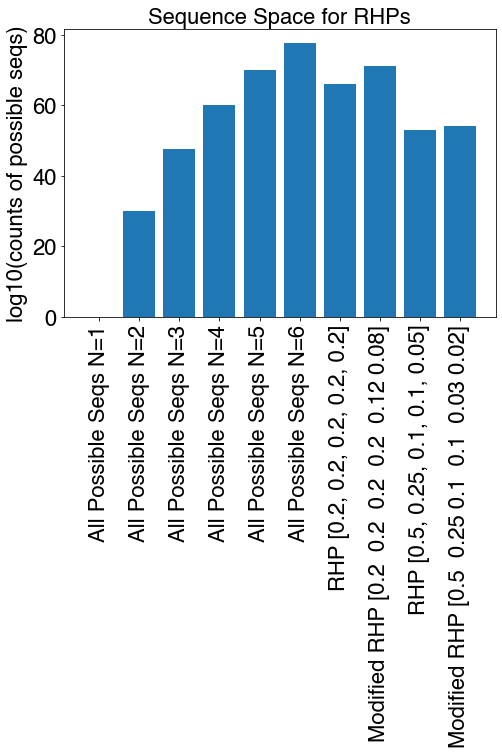

In [50]:
# script for Marco Fig1

y_vals = []
x_labels = []
for i in range(1,7):
    y_vals.append(log10(i**100))
    x_labels.append("All Possible Seqs N=" + str(i))

count_vals = []
labels = []
for target_DP in target_DPs:
    for MRs in MRss:
        rhp = calc_counts(target_DP,MRs)
        y_vals.append(rhp)
        x_labels.append("RHP " + str(MRs))
        
        pmod_MR = np.append(deepcopy(MRs), deepcopy(MRs[-1]*pmod_ratio))
        pmod_MR[-2] = pmod_MR[-2]*(1-pmod_ratio)
        pmod_rhp = calc_counts(target_DP, pmod_MR)
        y_vals.append(pmod_rhp)
        x_labels.append("Modified RHP " + str(pmod_MR))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_labels, y_vals)
title="Sequence Space for RHPs"
plt.title(title)
plt.xticks(x_labels, x_labels, rotation='vertical')
plt.ylabel("log10(counts of possible seqs)")
plt.show()
plt.cla()
plt.clf()
